**1:** Install relevant packages for the project. Ensure GPU is enabled in Edit -> Notebook Settings

In [ ]:
!pip install ultralytics==8.0.20 --quiet
!pip install roboflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.7/211.7 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00


**2:** Create relevant directories to hold the model and its files.

In [ ]:
import os
HOME = os.getcwd()

from ultralytics import YOLO

!mkdir {HOME}/datasets

**3:** Install training dataset labelled using Roboflow into the project by using download code provided by Roboflow.

In [ ]:
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="R7MdZH5htGoDprzt76na")
project = rf.workspace("cv-final-project").project("cv-japanese-coins")
dataset = project.version(4).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to CV-Japanese-Coins-4 in yolov8:: 100%|██████████| 1214/1214 [00:00<00:00, 2104.68it/s]


**4:** Import YOLOV8 for training the model and run the train command. Then validate it once the training is complete, and run the data on test set.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/CV-Japanese-Coins-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dy

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

2023-07-10 06:57:41.647208: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 06:57:43.090411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/CV-Japanese-Coins-4/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100% 35/35 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 149. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment m

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

2023-07-10 06:57:27.310377: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 06:57:28.299485: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/32 /content/datasets/CV-Japanese-Coins-4/test/images/IMG_5794_png.rf.9a1b8fa089aeb1eb2b0fe4a70c4f6933.jpg: 640x384 1 1, 62.1ms
image 2/32 /content/datasets/CV-Japanese-Coins-4/test/images/IMG_5805_png.rf.cc244b09da87f518a0d61a821d298e58.jpg: 640x384 1 5, 10.8ms
image 3/32 /content/datasets/CV-Japanese-Coins-4/test/images/IMG_5814_png.rf.d8573b96e5f9d7c856bb483adf4e8e93.jpg: 640x384 1 1

**5:** View some results from the run on the test set:

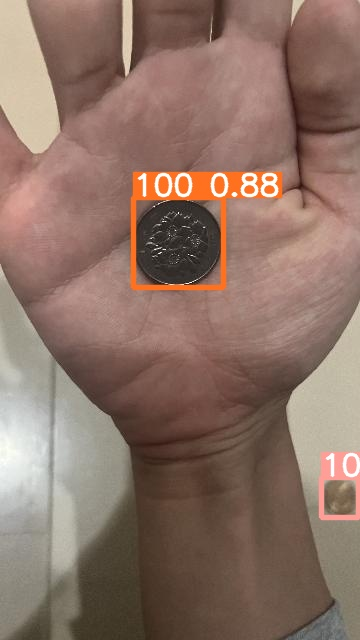

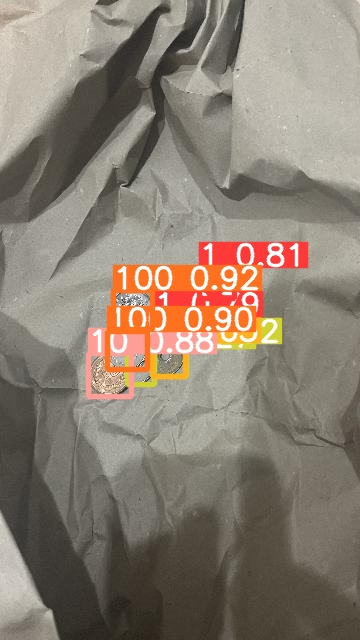

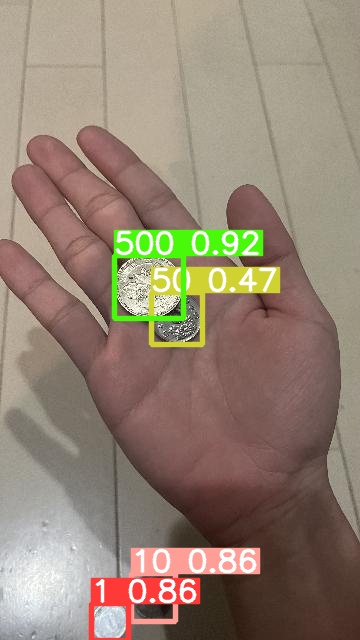

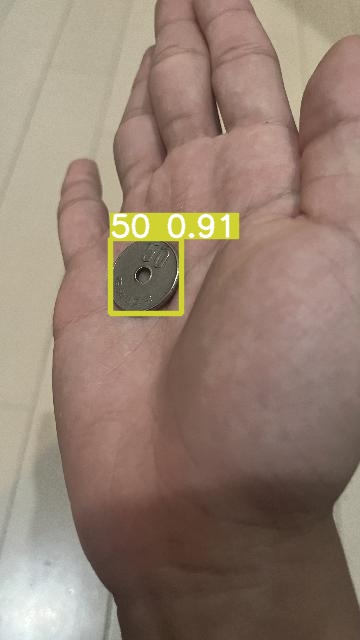

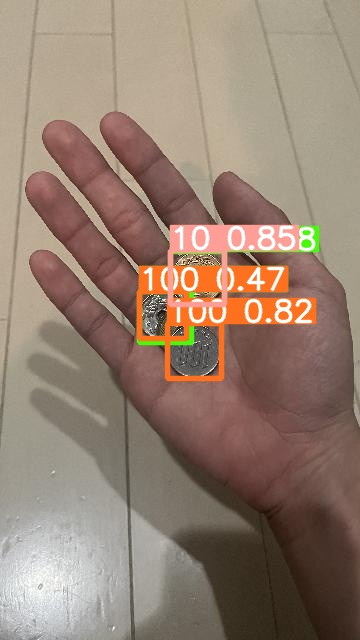

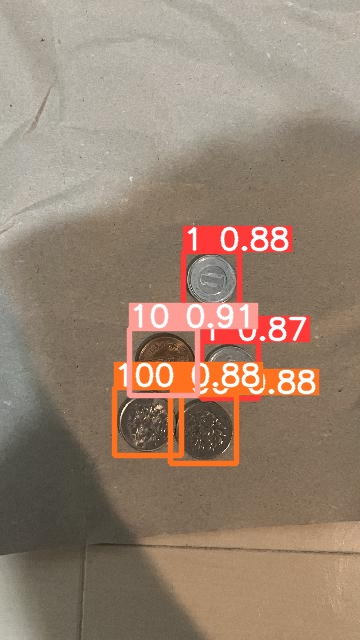

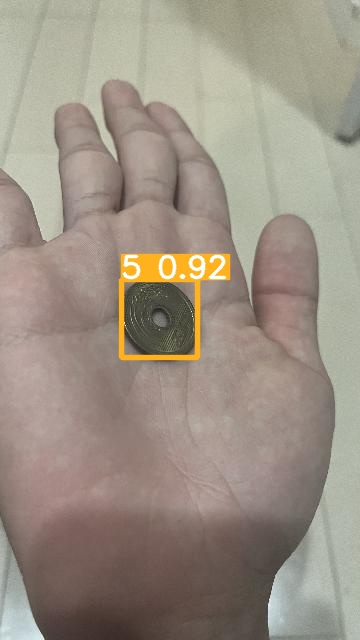

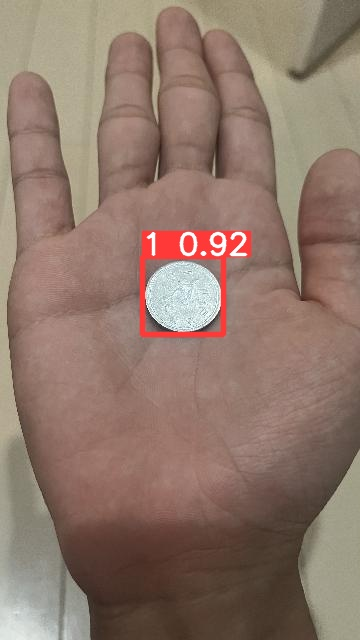

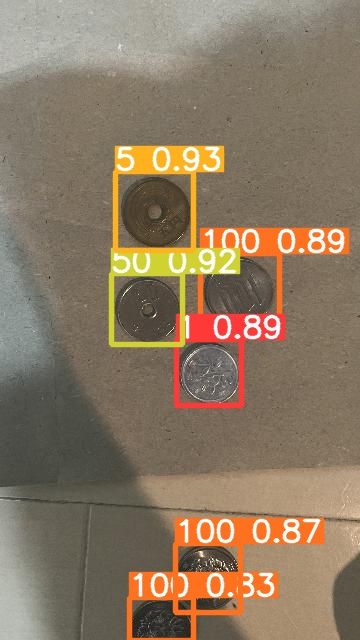

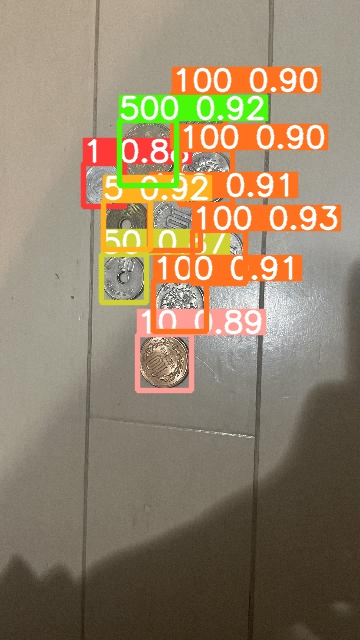

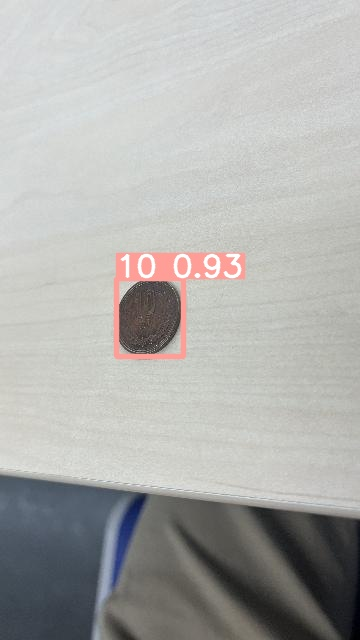

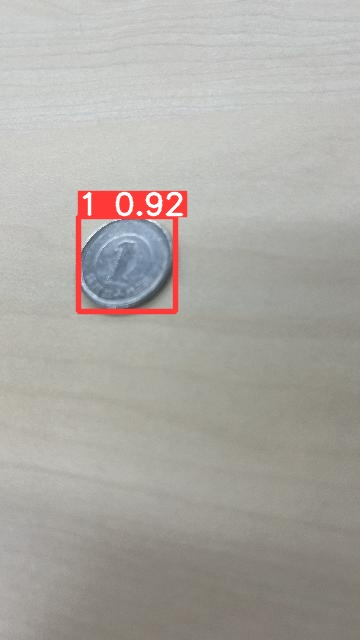

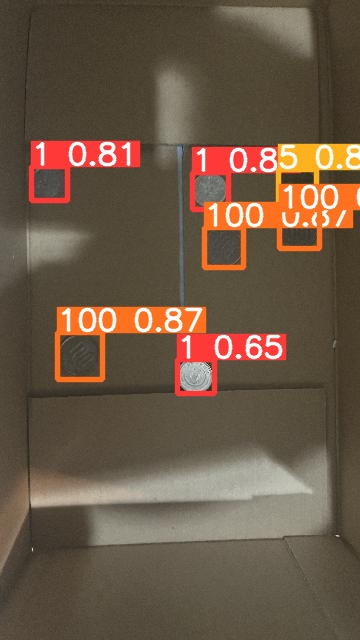

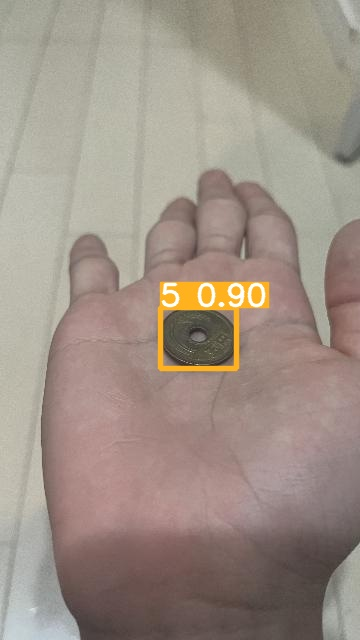

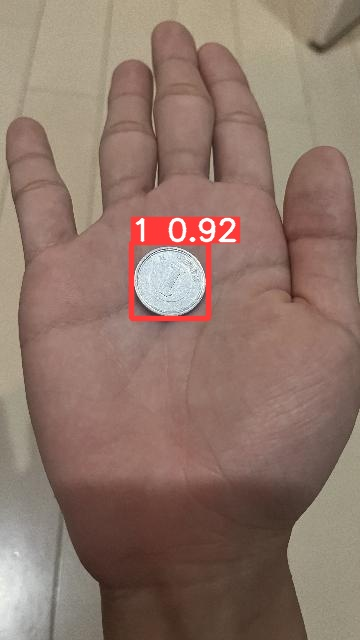

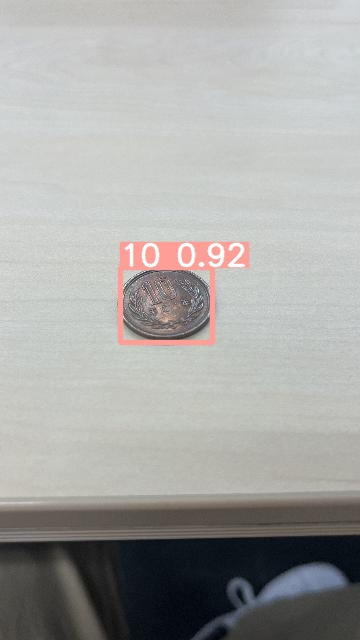

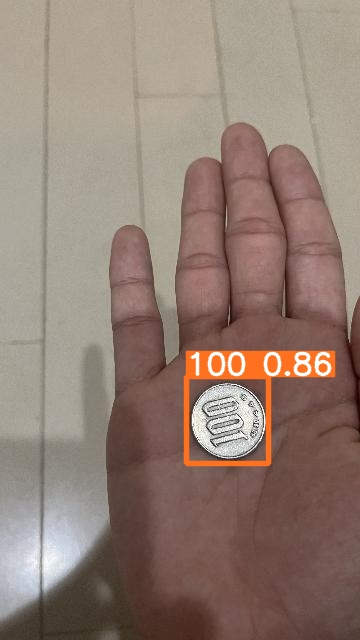

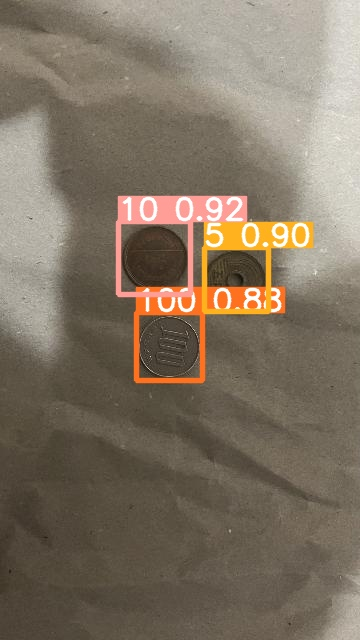

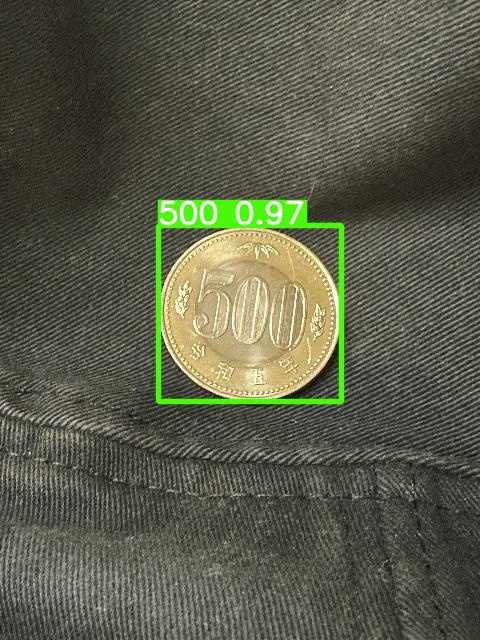

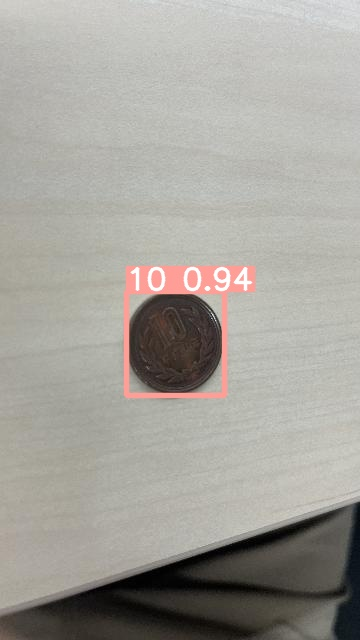

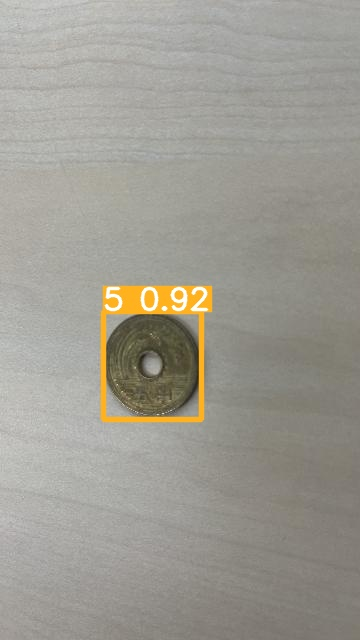

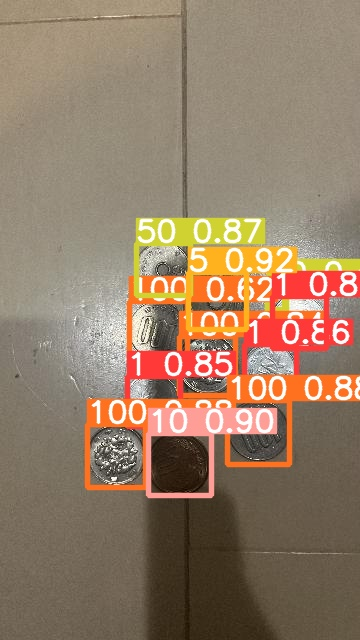

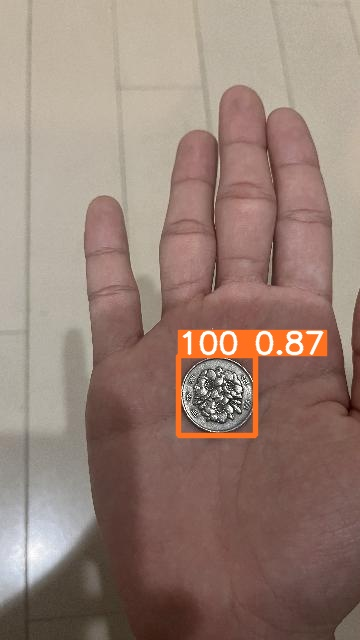

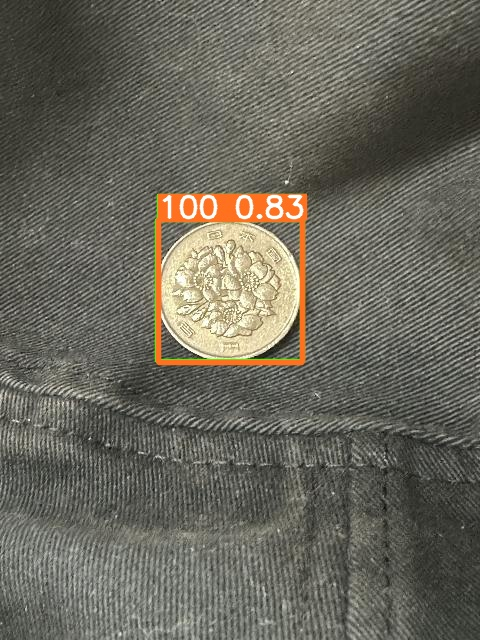

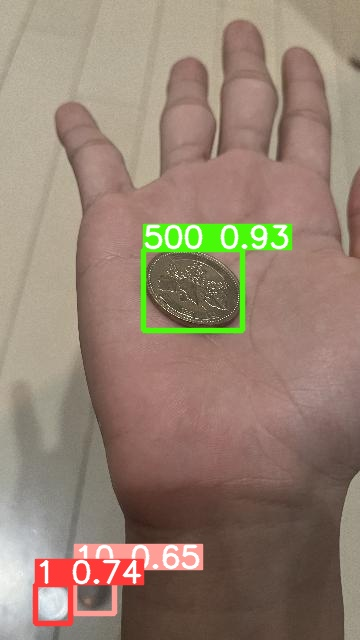

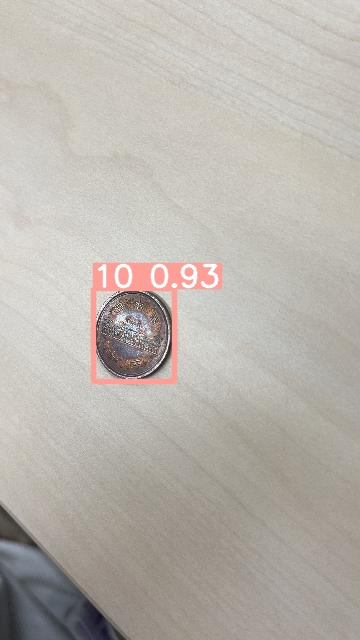

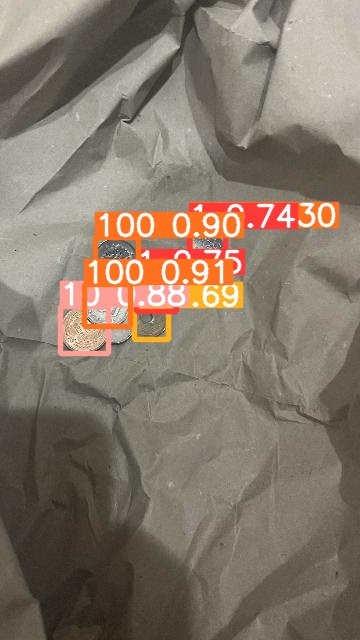

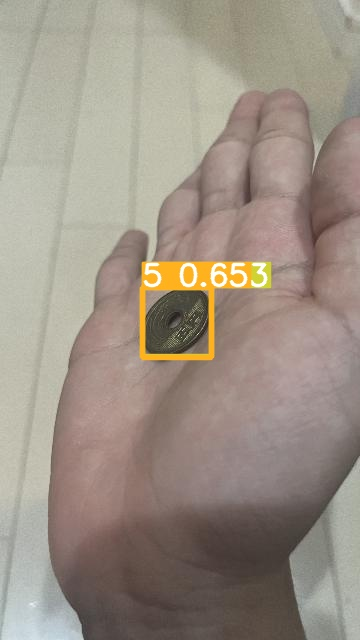

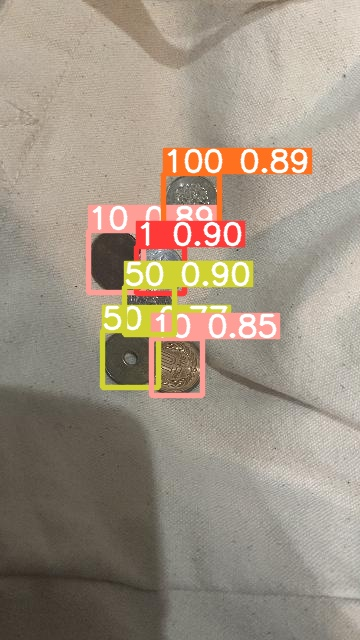

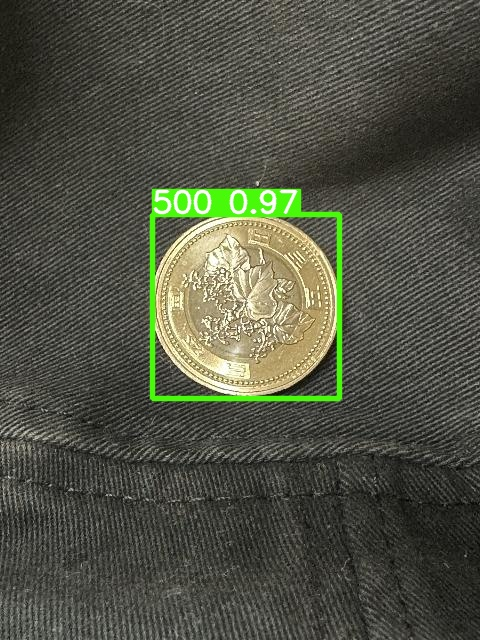

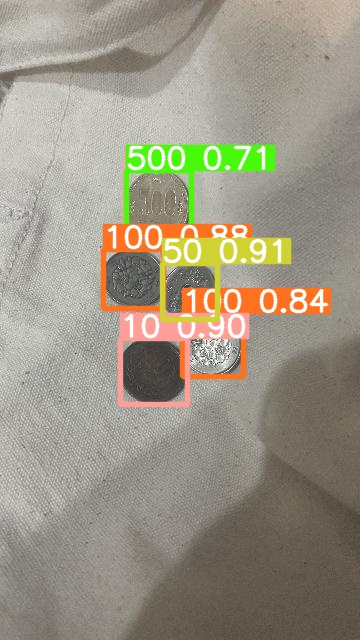

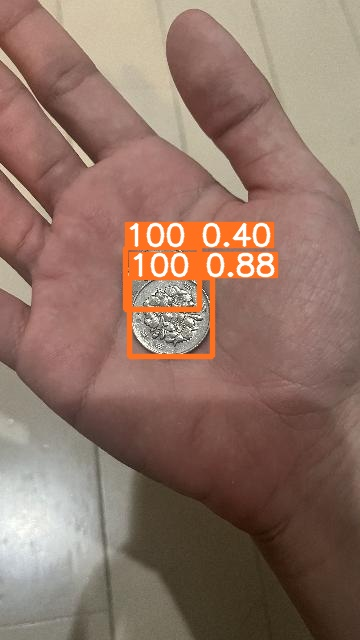

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

**6:** Export files as zip and extract

In [ ]:
%cd {HOME}
%cd ..

!zip -r /content/content.zip /content

[Errno 2] No such file or directory: '{HOME}'
/content
/
  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2023.07.06/ (stored 0%)
  adding: content/.config/logs/2023.07.06/13.43.52.281438.log (deflated 56%)
  adding: content/.config/logs/2023.07.06/13.43.27.707476.log (deflated 58%)
  adding: content/.config/logs/2023.07.06/13.43.51.592271.log (deflated 57%)
  adding: content/.config/logs/2023.07.06/13.42.57.549008.log (deflated 58%)
  adding: content/.config/logs/2023.07.06/13.43.20.947569.log (deflated 86%)
  adding: content/.config/logs/2023.07.06/13.42.33.252488.log (deflated 91%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_update_ch

In [ ]:
from google.colab import files

files.download("/content/content.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip -o /content/content.zip

Archive:  /content/content.zip
  inflating: content/.config/logs/2023.07.06/13.43.52.281438.log  
  inflating: content/.config/logs/2023.07.06/13.43.27.707476.log  
  inflating: content/.config/logs/2023.07.06/13.43.51.592271.log  
  inflating: content/.config/logs/2023.07.06/13.42.57.549008.log  
  inflating: content/.config/logs/2023.07.06/13.43.20.947569.log  
  inflating: content/.config/logs/2023.07.06/13.42.33.252488.log  
  inflating: content/.config/default_configs.db  
 extracting: content/.config/.last_survey_prompt.yaml  
 extracting: content/.config/active_config  
 extracting: content/.config/gce     
 extracting: content/.config/config_sentinel  
  inflating: content/.config/.last_update_check.json  
  inflating: content/.config/configurations/config_default  
 extracting: content/.config/.last_opt_in_prompt.yaml  
  inflating: content/sample_data/anscombe.json  
  inflating: content/sample_data/README.md  
  inflating: content/sample_data/california_housing_train.csv  
 